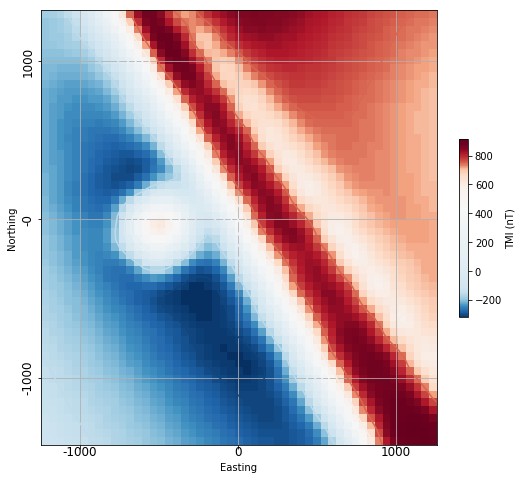

In [2]:
## Load all libraries and setup the synthetic problem
from library.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import numpy as np
from SimPEG import PF, Utils, Mesh, Maps
from SimPEG import Utils
from SimPEG.Utils import mkvc
import SimPEG.PF as PF
import scipy as sp
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Load data and topo and build default model
workDir = ''
fName = 'DataGrid.tiff'

dataGrid = DataIO.loadGeoTiffFile(workDir+fName, plotIt=True)

# X.X.	Depth estimation from Tilt angle#



<!-- <img src="./images/SearchQuestII.png"> -->


## Compute tilt angle


In [4]:
filters = MathUtils.gridFilter(dx=dataGrid.dx, dy=dataGrid.dy, grid=dataGrid.values)
tilt = filters.tiltAngle

## Get 0 contour
 

C:\Users\DominiqueFournier\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


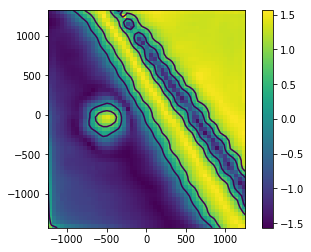

In [21]:
xLoc = np.asarray(range(dataGrid.nx))*dataGrid.dx+dataGrid.limits[0]
yLoc = np.asarray(range(dataGrid.ny))*dataGrid.dy+dataGrid.limits[2]
X, Y = np.meshgrid(xLoc, yLoc)

axs = plt.subplot()
plt.imshow(tilt, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower')
plt.colorbar()
C_0 = plt.contour(X,Y,tilt, levels=[0], color='w')
C_45 = plt.contour(X,Y,tilt, levels=[np.pi/4.], color='r')
axs.set_aspect('equal')

In [27]:
# Compute distance between contours
xx = C_0.allsegs[0][0].shape
yy = C_0.allsegs[0][1].shape

# Create ckDtree for shortest distance
